In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
road = cv2.imread('road_image.jpg')
# COPY OF THE ROAD IMAGE
road_copy = np.copy(road)

In [15]:
#SHAPE OF THE IMAGE
road_copy.shape

(600, 800, 3)

In [16]:
#WIDTH, HEIGHT OF THE IMAGE
road_copy.shape[:2]

(600, 800)

In [17]:
#SETTING IMAGE DIMENSIONS AND SEGMENTS
marker_image = np.zeros(road.shape[:2], dtype = np.int32)
segments = np.zeros(road.shape[:2], dtype = np.uint8)
marker_image.shape, segments.shape

((600, 800), (600, 800))

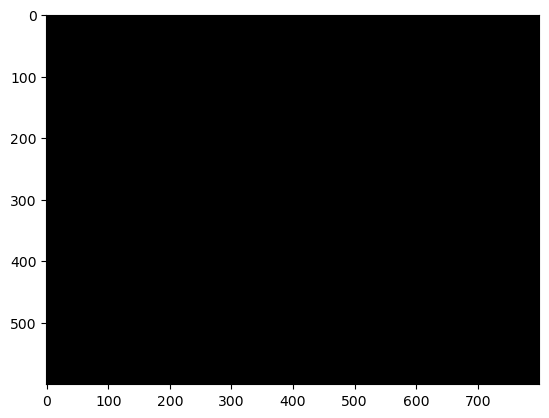

In [18]:
plt.imshow(marker_image, cmap='gray')
plt.show()

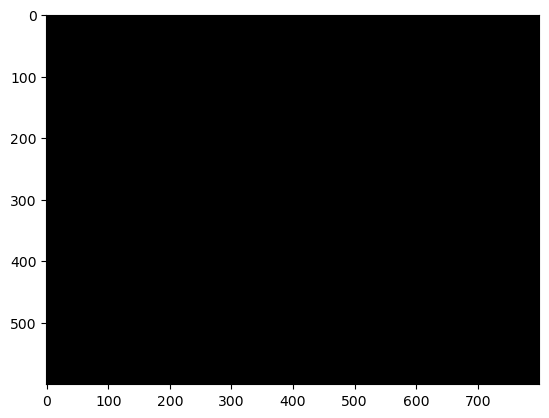

In [19]:
plt.imshow(segments, cmap='gray')
plt.show()

In [20]:
# CREATE THE COLOR FOR THE MARKERS
from matplotlib import cm
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [21]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))
colors

[(np.float64(31.0), np.float64(119.0), np.float64(180.0)),
 (np.float64(255.0), np.float64(127.0), np.float64(14.0)),
 (np.float64(44.0), np.float64(160.0), np.float64(44.0)),
 (np.float64(214.0), np.float64(39.0), np.float64(40.0)),
 (np.float64(148.0), np.float64(103.0), np.float64(189.0)),
 (np.float64(140.0), np.float64(86.0), np.float64(75.0)),
 (np.float64(227.0), np.float64(119.0), np.float64(194.0)),
 (np.float64(127.0), np.float64(127.0), np.float64(127.0)),
 (np.float64(188.0), np.float64(189.0), np.float64(34.0)),
 (np.float64(23.0), np.float64(190.0), np.float64(207.0))]

# SETTING THE CALLBACK

In [22]:
# CREATING THE GLOBAL VARIABLES
current_marker = 1
#MARKERS UPDATED BY THE WATERSHED ALGORITHM
marker_updated = False
n_markers = 10

In [23]:
#CALLBACK FUNCTION
def mouse_callback(event, x, y, flags, params):
    global marker_updated
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
        cv2.circle(road_copy, (x,y), 10,colors[current_marker], -1)
        marker_updated = True

In [ ]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marker_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marker_updated = False
        
cv2.destroyAllWindows()

In [ ]:
#WHILE TRUE
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)
while True:
    cv2.imshow('Watershed Segment', segments)
    cv2.imshow('Road Image', road_copy)
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype = np.int32)
        segements = np.zeros(road.shape, dtype = np.uint8)
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    if marker_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        segements = np.zeros(road.shape, dtype = np.uint8)
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        marker_updated = False
cv2.destroyAllWindows()